In [2]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

# Part A - 1, Creating Graphs based on input and initial analysis

### Input Dataframes

In [3]:
# Read in the Excel file 'randstad.xlsx' as a dataframe
randstad_network = pd.read_excel('Data_files/Part_1/Graph_randstad.xlsx')

# Show contents of the dataframe
randstad_network

,Locations,Population,Employees,Latitude,Longitude,0,1,2,3,4,...,12,13,14,15,16,17,18,19,20,21
0,Alkmaar,111834,120.154585,52.63160,4.753400,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Almere,222825,239.403449,52.35080,5.264700,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Alphen aan de Rijn,114182,122.677279,52.11120,4.647300,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
3,Amersfoort,160759,172.719664,52.15610,5.387800,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Amsterdam,918117,986.426015,52.36760,4.904100,0,1,0,0,0,...,0,0,1,0,1,0,0,1,1,0
5,Delft,106086,113.978927,52.01160,4.357100,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
6,Den Haag,562839,604.714902,52.07050,4.300700,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
7,Dordrecht,121434,130.468836,51.81330,4.690100,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
8,Gouda,75316,80.919601,52.01150,4.710500,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
9,Haarlem,165396,177.701662,52.38740,4.646299,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [4]:
# Make a graph from the dataframe
randstad_network_adjacency = randstad_network.iloc[:, 5:]
Randstad_Graph = nx.from_pandas_adjacency(randstad_network_adjacency)

In [5]:
# This functions adds attributes to the corresponding dataframe to the corresponding graph. The dataframe must contain location, positional and employers attributes.    
def adding_node_attributes(graph, dataframe):  
    # Getting the city names from the original dataframe
    location_names = {}
    # Gathering attributes for the graph
    pos_attributes = {}
    employees_attributes = {}  # For node size drawing, this must be list with data ordered in the order of nodes in the graph
    
    for i, location in enumerate(dataframe['Locations']):
        
        # Location names
        location_names.update({i: location})
        
        # The coordinates
        latitude = dataframe.loc[dataframe['Locations'] == location, 'Latitude'].iloc[0]
        longitude = dataframe.loc[dataframe['Locations'] == location, 'Longitude'].iloc[0]
        pos_attributes.update({i: (longitude, latitude)})
        
        # The employees 
        employees = dataframe.loc[dataframe['Locations'] == location, 'Employees'].iloc[0]
        employees_attributes.update({i: employees})
    
    nx.set_node_attributes(graph, pos_attributes, "pos")
    nx.set_node_attributes(graph, employees_attributes, "employees")
    nx.relabel_nodes(graph, location_names, copy=False)
    
adding_node_attributes(Randstad_Graph, randstad_network)

### Part A - Drawing the graph

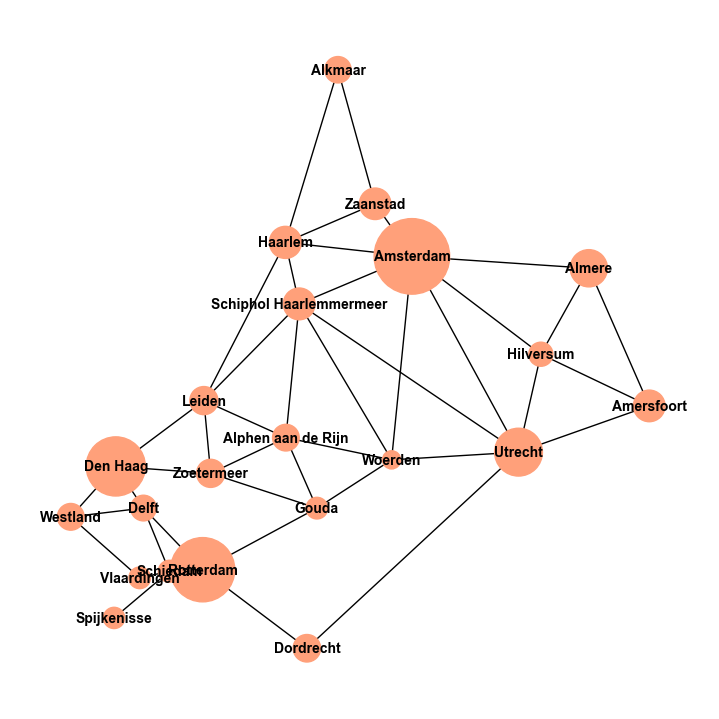

In [6]:
# A function that draws the network graph, it is important that the graphs has employee and positional values
def draw_graph(graph, node_color, edge_dictionary=None, edge_color=None):
    # getting the positional and size values
    pos = nx.get_node_attributes(graph, "pos")
    size_list = []
    for size in nx.get_node_attributes(graph, "employees").values():
        # Prevents places with 0 employees from disappearing
        if size != 0:
            size_list.append(3 * size)
        else:
            size_list.append(100)
    # Drawing  
    plt.figure(figsize=(7, 7))
    nx.draw(graph, 
            pos=pos, 
            with_labels=True, 
            node_size=size_list, 
            node_color=node_color, 
            font_size=10, 
            font_color='black', 
            font_weight='bold'
            )
    
    # If there are edge values given, then these will also be drawn in
    if edge_dictionary is not None:
        # The standard edge label color
        if edge_color is None:
            edge_color = 'red'
        # Drawing in the edges
        nx.draw_networkx_edge_labels(graph, 
                             pos=pos,
                             edge_labels=edge_dictionary,
                             font_color=edge_color,
                             )
        
    plt.show()
    
draw_graph(Randstad_Graph, 'lightsalmon')

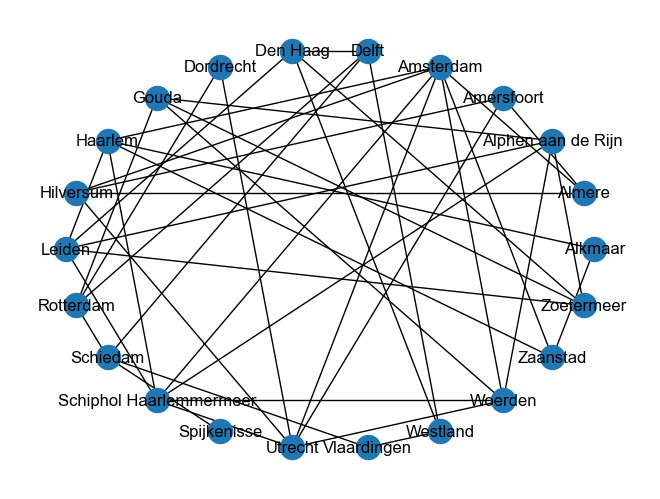

In [7]:
# Plot the graph, using a circular layout
nx.draw_circular(Randstad_Graph, with_labels=True)

### Adding Attributes

##### Now let's introduce the times of the routes in our graph

The next part of this notebook will include the times of the car routes as attributes in our graph.
This allows us to do more fruitful and fun analyses!
But first we have to load them in from a xlsx sheet and create a dataframe.
Then we modify this dataframe to subtract edge attributes.
Which we then will add in our graph.
Let's go!

In [10]:
# This functions allows the adding of edge attributes/weights to the Randstad network, based on a delivered dataframe with these attributes and a chosen attribute name
def adding_edge_attributes(graph, attribute_dataframe, name_attribute):    
    # Creating a dictionary to store all edges attributes in
    attribute_dictionary = {}
    
    # Use the already existing Randstad graph to look up the existing edges
    for edge in graph.edges():
        source, target = edge
        # Take the distance from the dataframe with all the car travel times
        value_attribute = attribute_dataframe.at[source, target]
        # Update those in one dictionary with edges as key and the distance as value
        attribute_dictionary.update({edge : value_attribute})
    
    
    # Update the Randstad graph with the newly configured car travel times
    nx.set_edge_attributes(graph, attribute_dictionary, name_attribute)
    
    return attribute_dictionary

In [11]:
# Reading the times from the Excel sheet
randstad_car_distance = pd.read_excel('Data_files/Part_1/Randstad_car_distance.xlsx')
randstad_car_times = pd.read_excel('Data_files/Part_1/Randstad_car_times.xlsx')

# Clean up the DataFrame, so extraction is easier, here we make the cities columns also the indices
randstad_car_distance.set_index('Locations', inplace=True)
randstad_car_times.set_index('Locations', inplace=True)
randstad_car_times

,Alkmaar,Almere,Alphen aan de Rijn,Amersfoort,Amsterdam,Delft,Den Haag,Dordrecht,Gouda,Haarlem,...,Rotterdam,Schiedam,Schiphol Haarlemmermeer,Spijkenisse,Utrecht,Vlaardingen,Westland,Woerden,Zaanstad,Zoetermeer
Locations,,,,,,,,,,,,,,,,,,,,,
Alkmaar,x,x,x,x,x,x,x,x,x,26,...,x,x,x,x,x,x,x,x,24,x
Almere,x,x,x,37,28,x,x,x,x,x,...,x,x,x,x,x,x,x,x,x,x
Alphen aan de Rijn,x,x,x,x,x,x,x,x,26,x,...,x,x,22,x,x,x,x,22,x,22
Amersfoort,x,37,x,x,38,x,x,x,x,x,...,x,x,x,x,23,x,x,x,x,x
Amsterdam,x,28,x,38,x,x,x,x,x,25,...,x,x,21,x,40,x,x,41,16,x
Delft,x,x,x,x,x,x,20,x,x,x,...,20,23,x,x,x,20,23,x,x,21
Den Haag,x,x,x,x,x,20,x,x,x,x,...,x,x,x,x,x,x,18,x,x,18
Dordrecht,x,x,x,x,x,x,x,x,x,x,...,27,x,x,x,44,x,x,x,x,x
Gouda,x,x,26,x,x,x,x,x,x,x,...,28,x,x,x,x,x,x,21,x,20


In [12]:
distance_dictionary = adding_edge_attributes(Randstad_Graph, randstad_car_distance, 'length')
time_dictionary = adding_edge_attributes(Randstad_Graph, randstad_car_times, 'time')

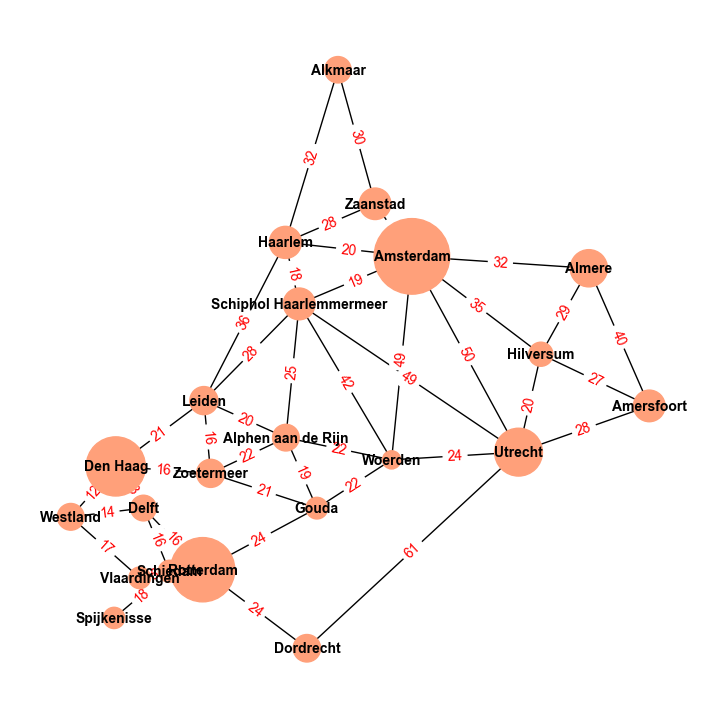

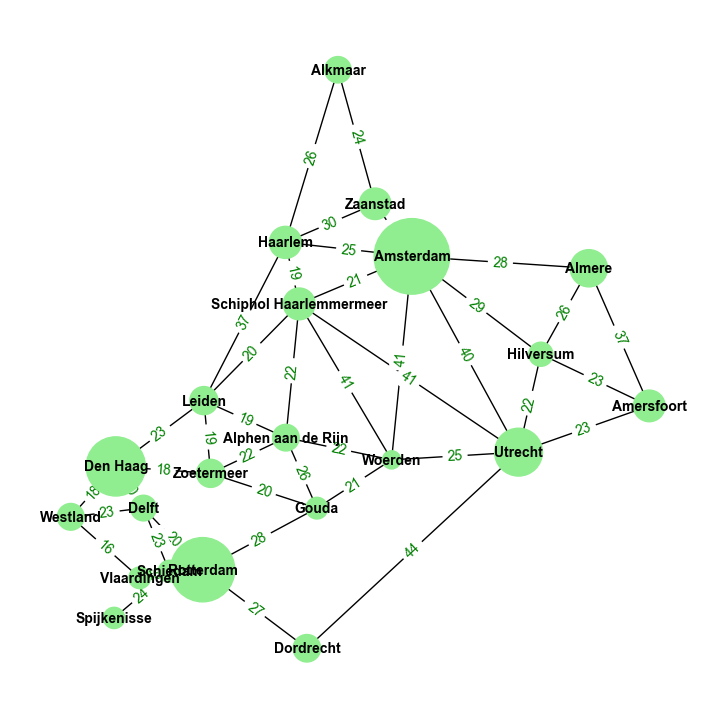

In [13]:
draw_graph(Randstad_Graph, 'lightsalmon', edge_dictionary=distance_dictionary, edge_color='red')
draw_graph(Randstad_Graph, 'lightgreen', edge_dictionary=time_dictionary, edge_color='green')

### Plotting Charateristics

Here we plot the fundamental charateristics of our created graphs.

C:\Users\TimEW\AppData\Local\Temp\ipykernel_6056\1071395020.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  G_betweenness.set_xticklabels(G_betweenness.get_xticklabels(), rotation=90, color='black', ha='center')


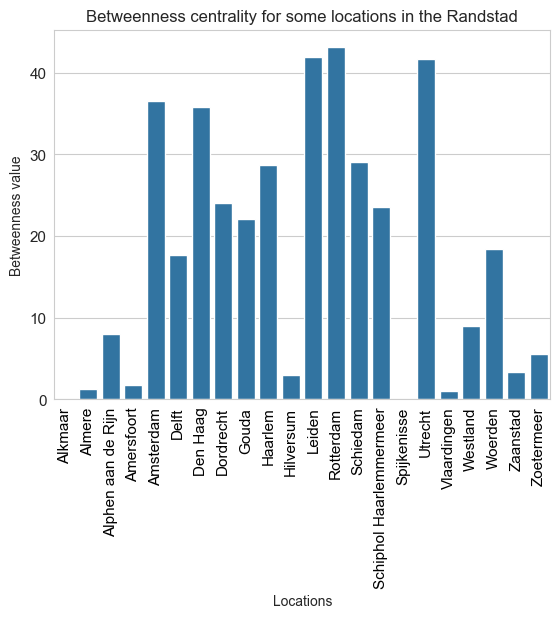

In [14]:
# plotting betweenness function
def plot_betweenness(graph, graph_name, weight=None):
    #Calculate the betweenness centrality, don't normalize
    betweenness = nx.betweenness_centrality(graph,k=None,normalized=False, weight=weight)
    # Plot the values in a bar chart
    G_betweenness = sns.barplot(betweenness)
    if weight is not None:
        G_betweenness.set_title(f"Betweenness centrality for some locations in the {graph_name}, based on {weight}")
    else:
        G_betweenness.set_title(f"Betweenness centrality for some locations in the {graph_name}")
    G_betweenness.set_xticklabels(G_betweenness.get_xticklabels(), rotation=90, color='black', ha='center')
    G_betweenness.tick_params(direction='out', pad=2, labelsize=11)
    G_betweenness.set(xlabel='Locations', ylabel='Betweenness value')
    plt.show()
    
plot_betweenness(Randstad_Graph, 'Randstad')

In [17]:
#Calculate the weighted edge betweenness centrality, normalize
edge_betweenness_weighted_distance = nx.edge_betweenness_centrality(Randstad_Graph,
                                                                    k=None,
                                                                    normalized=True,
                                                                    weight='length',
                                                                    seed=None)
#Calculate the weighted edge betweenness centrality, normalize
edge_betweenness_weighted_time = nx.edge_betweenness_centrality(Randstad_Graph,
                                                                k=None,
                                                                normalized=True,
                                                                weight='time',
                                                                seed=None)

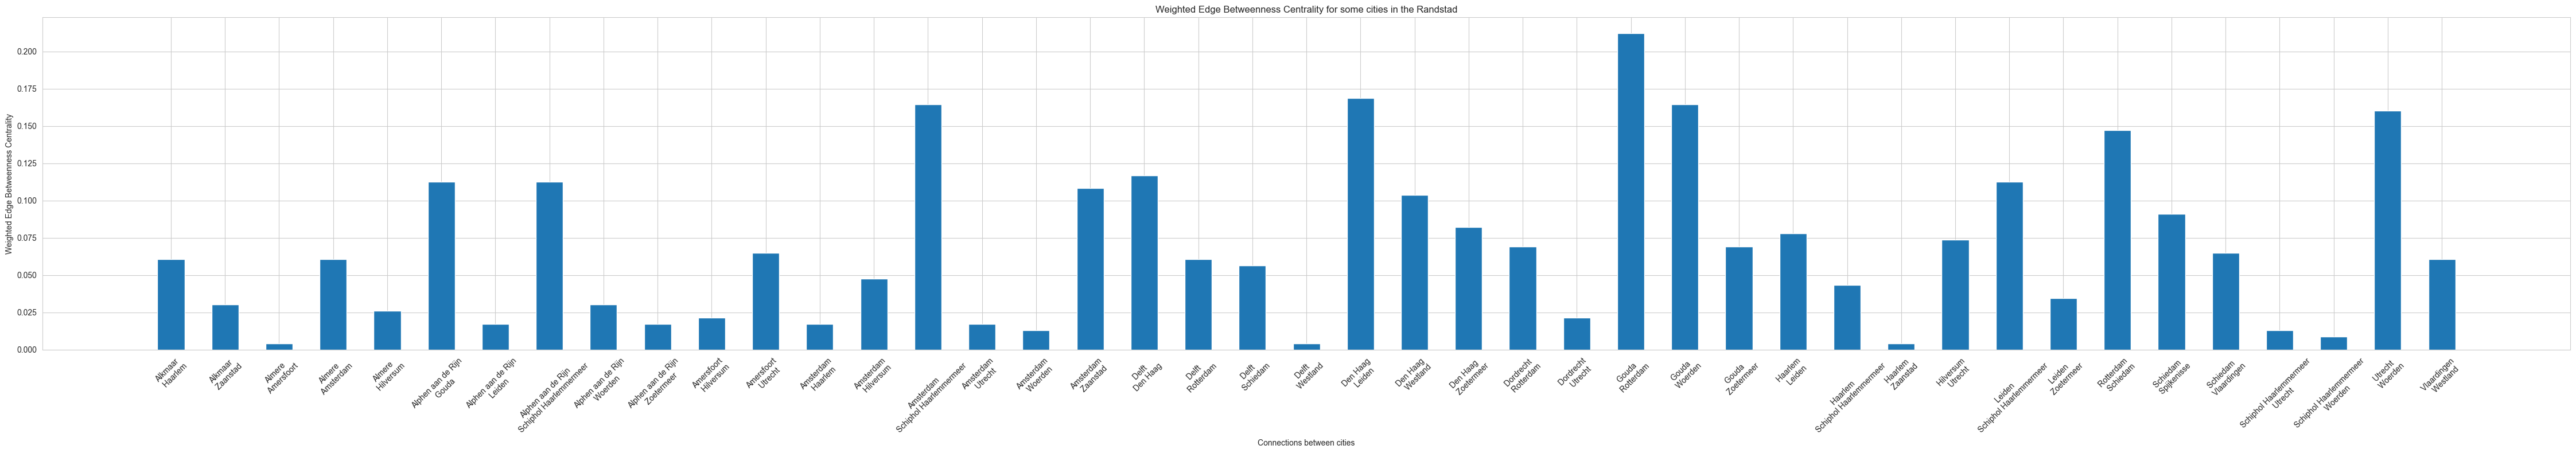

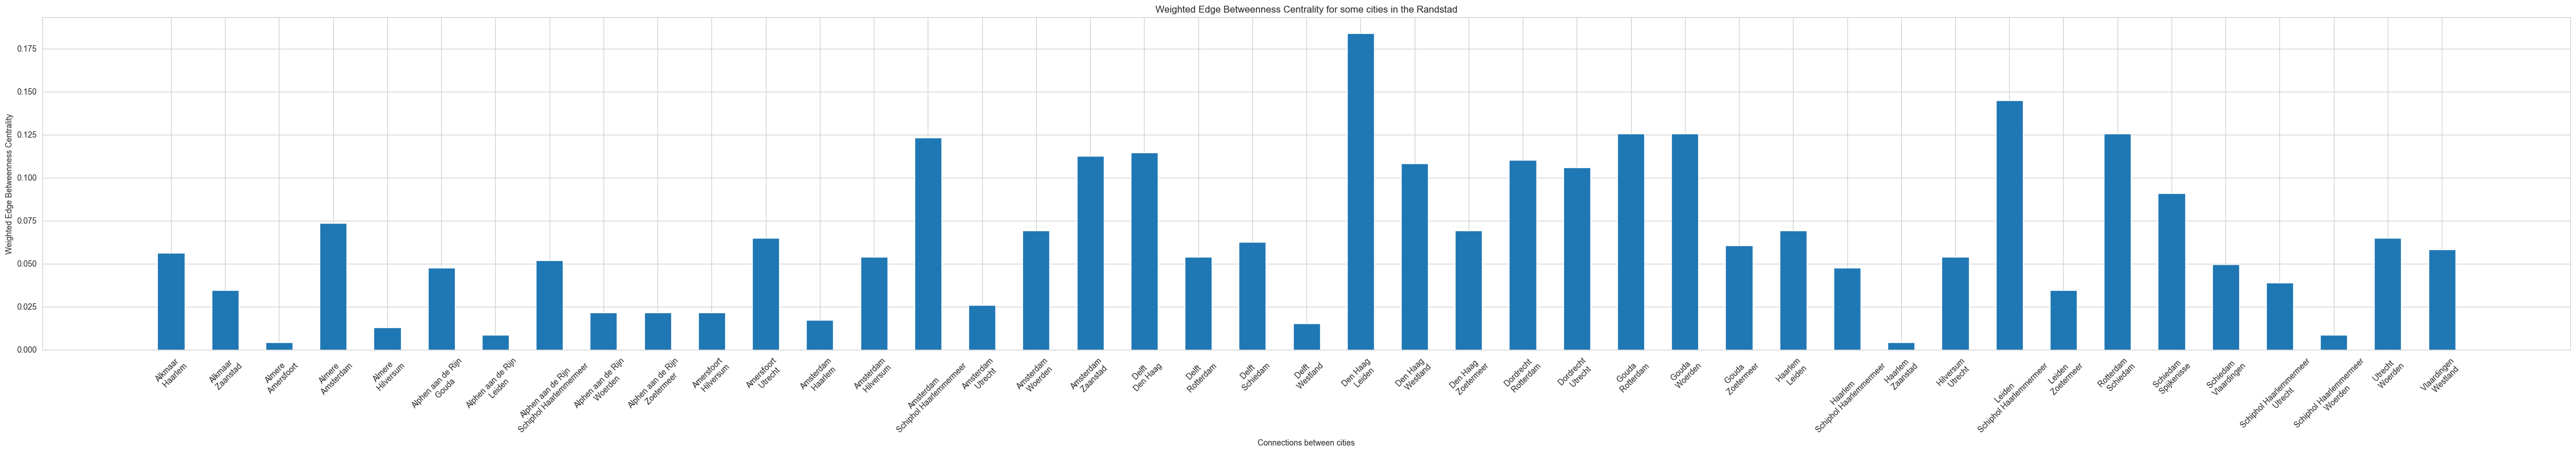

In [18]:
# Helper function for parsing the edge labels
def pp_edges(l):
    rl = []
    for i in range(len(l)):
        rl.append(str(l[i][0]) + ' \n ' + str(l[i][1]))
    return rl

# Plot the values in a bar chart
plt.figure(figsize=(45, 8))
plt.bar(range(len(edge_betweenness_weighted_distance)), edge_betweenness_weighted_distance.values(), width=0.5)
plt.xticks(range(len(edge_betweenness_weighted_distance)), pp_edges(list(edge_betweenness_weighted_distance.keys())), rotation=45, ha='center')
plt.title("Weighted Edge Betweenness Centrality for some cities in the Randstad")
plt.xlabel("Connections between cities")
plt.ylabel("Weighted Edge Betweenness Centrality")
plt.tight_layout()
plt.show()

# Plot the values in a bar chart
plt.figure(figsize=(45, 8))
plt.bar(range(len(edge_betweenness_weighted_time)), edge_betweenness_weighted_time.values(), width=0.5)
plt.xticks(range(len(edge_betweenness_weighted_time)), pp_edges(list(edge_betweenness_weighted_time.keys())), rotation=45, ha='center')
plt.title("Weighted Edge Betweenness Centrality for some cities in the Randstad")
plt.xlabel("Connections between cities")
plt.ylabel("Weighted Edge Betweenness Centrality")
plt.tight_layout()
plt.show()

C:\Users\TimEW\AppData\Local\Temp\ipykernel_6056\1071395020.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  G_betweenness.set_xticklabels(G_betweenness.get_xticklabels(), rotation=90, color='black', ha='center')


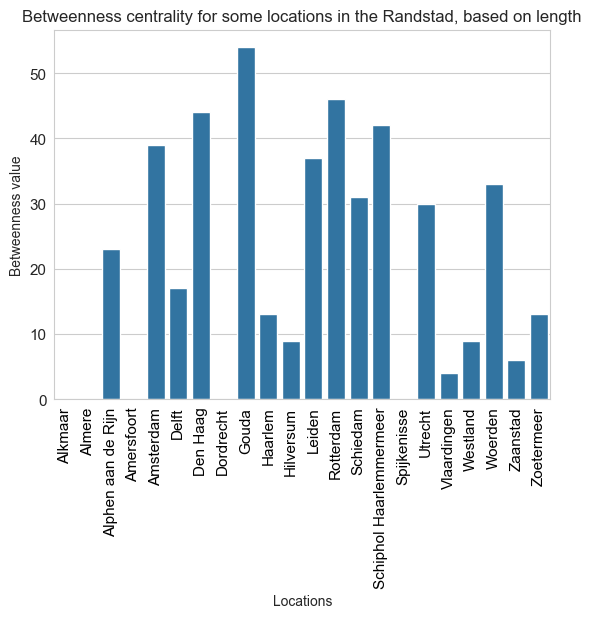

C:\Users\TimEW\AppData\Local\Temp\ipykernel_6056\1071395020.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  G_betweenness.set_xticklabels(G_betweenness.get_xticklabels(), rotation=90, color='black', ha='center')


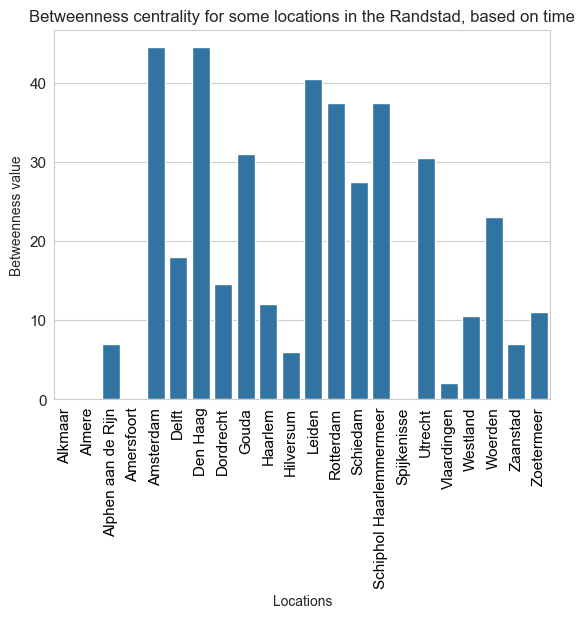

In [19]:
# Betweenness centrality with the time and distance as factor
plot_betweenness(Randstad_Graph, 'Randstad', weight='length')
plot_betweenness(Randstad_Graph, 'Randstad', weight='time')

# Part A - 2, Finding the Offices

### Route Calculations

##### Now we are going to use two different ways to calculate the travel times or distances to two offices

With the first couple of methods, all travel times to both respective offices (read destination cities) are calculated and the minimum times with the corresponding offices are selected.

In reality though, people would only consider the travel time or distance to their nearest office. Thus, in the methods thereafter, only the travel times from each city to their respective nearest office are taken into account. Furthermore, these sophisticated functions also take into account the total amount of employees that is in each city and has to travel to their nearest office. This makes cities with lots of employees weigh more in their travel time or distance calculations to the nearest office.

These times or distances will then be minimised by investigating every possible combination of office/destination cities and picking those with the lowest total travel time or distance form each city in the graph.

We also have to consider the way employees travel. Traveling from location to location is different whether the traveller actually intents to visit a location or is merely passing by. In the latter case one would travel significantly faster since they are not going to the location center and stay on the road/highway that happens to pass by a location in a graph.

In [90]:
# A function to choose the quickest or shortest (depending on selected weight) path between source and target node, returns dict like object if either source and/or target is None. This modified version takes into account whether the locations visited are the final destination or in-between-stops on a path. In the latter case there is a time correction applied so the travel times reflect reality better.
def shortest_path(graph, source=None, target=None, weight=None):
    short_path = nx.shortest_path(graph, source=source, target=target, weight=weight)
    return short_path

def path_weight(graph, path, weight):
    path_weight = nx.path_weight(graph, path, weight=weight)
    # If travel times are calculated and there are in-between-stops a correction is made for the travel time. Also prepared for part 2 (car weights)
    if (weight == 'time' or weight == 'car') and len(path) > 2:
        correction_factor = (len(path) - 2) * 7
        path_weight -= correction_factor
    return path_weight
        

# Testing area to see whether the functions work
path1 = shortest_path(Randstad_Graph, 'Amsterdam', 'Delft', weight='length')
print(path1)
print(f'{path_weight(Randstad_Graph, path1, weight='length')} km')
print(f'{path_weight(Randstad_Graph, path1, weight='time')} minutes\n')

# Testing area to see whether the functions work
path2 = shortest_path(Randstad_Graph, 'Amsterdam', 'Delft', weight='time')
print(path2)
print(f'{path_weight(Randstad_Graph, path2, weight='length')} km')
print(f'{path_weight(Randstad_Graph, path2, weight='time')} minutes')

['Amsterdam', 'Schiphol Haarlemmermeer', 'Leiden', 'Den Haag', 'Delft']
81 km
63 minutes

['Amsterdam', 'Schiphol Haarlemmermeer', 'Leiden', 'Den Haag', 'Delft']
81 km
63 minutes


In [91]:
# A function where only the travel time to the closest office is taken into consideration
# Furthermore the function takes into account how many employees per starting city have to travel to the closest office
# It thus calculates the total employee travel time or distance to the closest office and sums this up. 
# The weight attribute depends on the use of time or distance.
def travel_amount_car_closest_office(graph, office_1, office_2, weight):
    # Creates two dicts with all the paths to the offices from every node
    all_paths_1 = shortest_path(graph, target=office_1, weight=weight)
    all_paths_2 = shortest_path(graph, target=office_2, weight=weight)
    
    # Find for every starting node the closest office with corresponding travel time or distance and sum these together
    total_employee_amount_office_closest_office = 0
    
    for starting_city in graph.nodes():
        # The quickest paths to both offices
        path_1 = all_paths_1[starting_city]
        path_2 = all_paths_2[starting_city]
        
        # The duration or distance of these paths
        travel_amount_1 = path_weight(graph, path_1, weight=weight)
        travel_amount_2 = path_weight(graph, path_2, weight=weight)
        
        # Only the time or distance of the closest office is used factored by the amount of employees traveling/distance this time
        city_employees = graph.nodes[starting_city]['employees']
        total_employee_amount_office_closest_office += min(travel_amount_1, travel_amount_2) * city_employees
        
    return total_employee_amount_office_closest_office

print(f'The average employee travel distance with the offices, Schiphol Haarlemmermeer and Zoetermeer: {(travel_amount_car_closest_office(Randstad_Graph, 'Schiphol Haarlemmermeer', 'Zoetermeer', 'length'))/5000}')

print(f'The average employee travel time with the offices, Schiphol Haarlemmermeer and Zoetermeer: {(travel_amount_car_closest_office(Randstad_Graph, 'Schiphol Haarlemmermeer', 'Zoetermeer', 'time'))/5000}')

The average employee travel distance with the offices, Schiphol Haarlemmermeer and Zoetermeer: 32.479175418559855
The average employee travel time with the offices, Schiphol Haarlemmermeer and Zoetermeer: 30.054831635958493


In [92]:
import itertools

# This function finds the combination of offices with the least amount of travel to the office of all employees. It looks per combination per city what the closest office is and weighs this with the amount of employees for said city. The combination that results in the lowest travel amount weighted for each starting city with corresponding employee numbers is given as output, including the average travel amount for all employees to their nearest office and the total minimal travel amount per employee. Only the closest office is taken into consideration per starting city. The weight attribute depends on the use of time or distance.
def minimise_travel_amount_closest_office(graph, weight):
    # Set up the minimum travel amount of both offices
    minimum_travel_amount_all_employees = np.inf
    selected_office_1 = ''
    selected_office_2 = ''
    average_travel_amount_selected_office_1 = 0
    average_travel_amount_selected_office_2 = 0
    
    # Create a list of all possible office combinations in all cities, the offices need to be in two different cities. This uses a tool called itertools combinations, which creates all unique possible combinations out of a list of unique elements.
    office_list = [i for i in graph.nodes()]
    office_combinations = itertools.combinations(office_list, 2)
    
    # Run through these combinations to find the minimum travel time and the corresponding offices
    for combination in office_combinations:
        # Get the office from the combination
        office_1, office_2 = combination
        
        # Travel amount from selected city for all employees from said city
        total_employee_travel_amount_office_1 = 0
        total_employee_travel_amount_office_2 = 0
        employees_office_1 = 0
        employees_office_2 = 0
    
        for i, city in enumerate(graph.nodes()):
            
            # It looks at the amount of employees that have to travel to this office
            city_employees = graph.nodes[city]['employees']
            
            # Paths to both offices
            path_1 = shortest_path(graph, source=city, target=office_1, weight=weight)
            path_2 = shortest_path(graph, source=city, target=office_2, weight=weight)
            
            # The duration of these paths
            travel_amount_1 = path_weight(graph, path_1, weight=weight)
            travel_amount_2 = path_weight(graph, path_2, weight=weight)
            
            # If office one is closer, the node gets recolored, the other ones (to office 2) keep their color
            if travel_amount_1 > travel_amount_2:
                total_employee_travel_amount_office_2 += travel_amount_2 * city_employees
                employees_office_2 += city_employees            
            else:
                total_employee_travel_amount_office_1 += travel_amount_1 * city_employees
                employees_office_1 += city_employees
        
        average_travel_amount_office_1 = total_employee_travel_amount_office_1 / employees_office_1
        average_travel_amount_office_2 = total_employee_travel_amount_office_2 / employees_office_2
        
        total_amount_all_offices = total_employee_travel_amount_office_1 + total_employee_travel_amount_office_2
        
        if minimum_travel_amount_all_employees > total_amount_all_offices: 
            minimum_travel_amount_all_employees = total_amount_all_offices
            average_travel_amount_selected_office_1 = average_travel_amount_office_1
            average_travel_amount_selected_office_2 = average_travel_amount_office_2
            selected_office_1 = office_1
            selected_office_2 = office_2
            
    return selected_office_1,average_travel_amount_selected_office_1,selected_office_2,average_travel_amount_selected_office_2,minimum_travel_amount_all_employees

selected_office_1,average_travel_amount_selected_office_1_distance,selected_office_2,average_travel_amount_selected_office_2_distance,minimum_travel_distance_all_employees = minimise_travel_amount_closest_office(Randstad_Graph, 'length')

selected_office_1_time,average_travel_amount_selected_office_1,selected_office_2_time,average_travel_amount_selected_office_2,minimum_travel_time_all_employees = minimise_travel_amount_closest_office(Randstad_Graph, 'time')

print(f'The minimised employee travel distance resulted in the offices: {selected_office_1} and {selected_office_2}\nWith and average employee travel distance of : {minimum_travel_distance_all_employees/5000} kilometer')
print('\n')
print(f'The minimised employee travel time resulted in the offices: {selected_office_1_time} and {selected_office_2_time}\nWith and average employee travel time of : {minimum_travel_time_all_employees/5000} minutes')

The minimised employee travel distance resulted in the offices: Amsterdam and Delft
With and average employee travel distance of : 21.512159750567015 kilometer


The minimised employee travel time resulted in the offices: Amsterdam and Rotterdam
With and average employee travel time of : 20.63279824571771 minutes


### Now we start plotting in the office locations

But first let's make some auxiliary functions

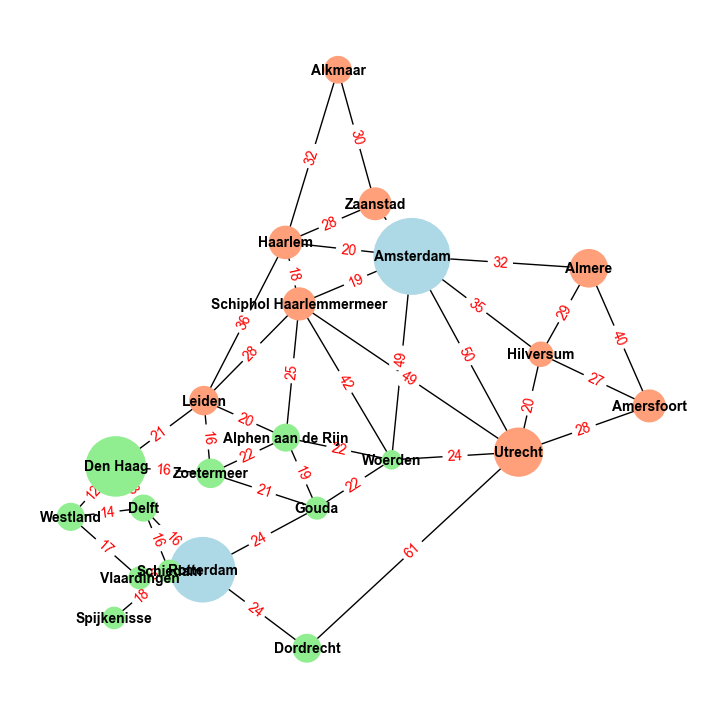

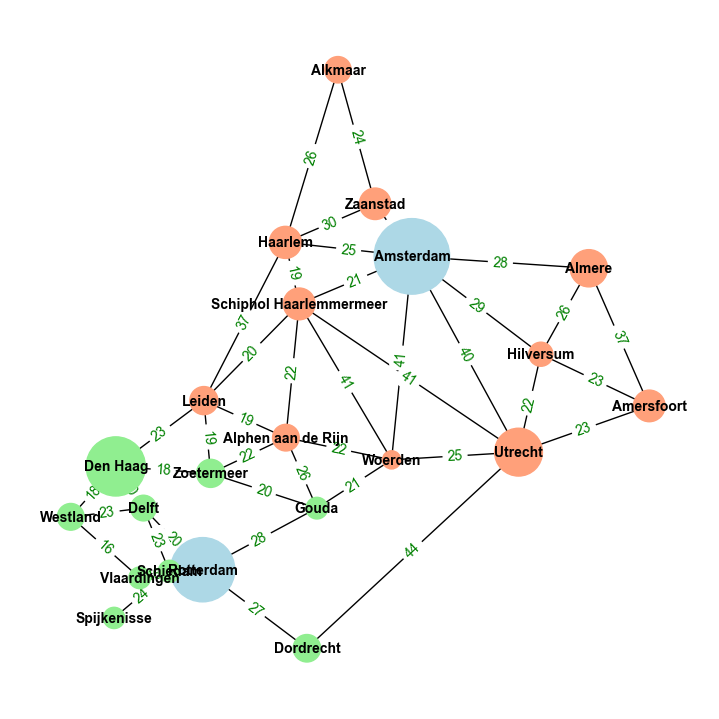

In [93]:
# A function that gives each node/city in the graph a color, one for the selected offices / destination nodes, the other for the closest to office one and the last for the closest to office two. The weight attribute depends on the use of time or distance.
def coloring_nodes_offices(graph, office_1, office_2, weight):
    node_color_list = []
    for i, city in enumerate(graph.nodes()):
        node_color_list.append('lightsalmon')
        if city in [office_1, office_2]:
            node_color_list[i] = 'lightblue'
        else:
            # Paths to both offices
            path_1 = shortest_path(graph, source=city, target=office_1, weight=weight)
            path_2 = shortest_path(graph, source=city, target=office_2, weight=weight)
            
            # The duration of these paths
            travel_amount_1 = path_weight(graph, path_1, weight=weight)
            travel_amount_2 = path_weight(graph, path_2, weight=weight)
            # If office one is closer, the node gets recolored, the other ones (to office 1) keep their color
            if travel_amount_1 > travel_amount_2:
                node_color_list[i] = 'lightgreen'
                
    return node_color_list

color_list_distance = coloring_nodes_offices(Randstad_Graph, 'Amsterdam', 'Rotterdam', 'length')
color_list_time = coloring_nodes_offices(Randstad_Graph, 'Amsterdam', 'Rotterdam', 'time')

draw_graph(Randstad_Graph, color_list_distance, edge_dictionary=distance_dictionary, edge_color='red')
draw_graph(Randstad_Graph, color_list_time, edge_dictionary=time_dictionary, edge_color='green')

In [95]:
# Function that only takes one office into consideration and calculates the travel amount to said one office.
def one_office(graph, weight):
    
    # First define the desired variables
    total_path_amount = np.inf
    closest_office = ''
    total_amount_of_employees = 0
    
    # For each office in the graph do the calculations
    for office in graph.nodes():
        
        # For every office it restarts the travel counter
        total_employee_travel_amount = 0
        total_amount_of_employees += graph.nodes[office]['employees']
        
        # For each city in the graph it calculates and sums the time towards this office
        for start_city in graph.nodes():
            
            # It looks at the amount of employees that have to travel to this office
            city_employees = graph.nodes[start_city]['employees']
            
            short_path = shortest_path(graph, source=start_city, target=office, weight=weight)
            total_employee_travel_amount += path_weight(graph, short_path, weight=weight) * city_employees
            
        if total_path_amount > total_employee_travel_amount:
            total_path_amount = total_employee_travel_amount
            closest_office = office
    
    # It corrects the office travel amount for the total amount of employees
    total_path_amount = total_path_amount/total_amount_of_employees
    
    return total_path_amount, closest_office
        
time, most_desired = one_office(Randstad_Graph, 'length')
print(f'The most desired office is {most_desired} with a travel time of {time} minutes\n')

The most desired office is Alphen aan de Rijn with a travel time of 45.32640394692027 minutes


In [96]:
# A function that gives the travel amounts to the closest office only and the average travel amount and also two list of cities each for their closest office respectively
def average_amount_per_office(graph, office_1, office_2, weight):
    # All nodes to their closest office
    node_list_office_1 = []
    node_list_office_2 = []
    
    # Travel amount from selected city for all employees from said city
    total_employee_travel_amount_office_1 = 0
    total_employee_travel_amount_office_2 = 0
    employees_office_1 = 0
    employees_office_2 = 0
    
    for i, city in enumerate(graph.nodes()):
        
        # It looks at the amount of employees that have to travel to this office
        city_employees = graph.nodes[city]['employees']
        
        # Paths to both offices
        path_1 = shortest_path(graph, source=city, target=office_1, weight=weight)
        path_2 = shortest_path(graph, source=city, target=office_2, weight=weight)
        
        # The duration of these paths
        travel_amount_1 = path_weight(graph, path_1, weight=weight)
        travel_amount_2 = path_weight(graph, path_2, weight=weight)
        
        # If office one is closer, the node gets recolored, the other ones (to office 2) keep their color
        if travel_amount_1 > travel_amount_2:
            node_list_office_2.append(city)
            total_employee_travel_amount_office_2 += travel_amount_2 * city_employees
            employees_office_2 += city_employees            
        else:
            node_list_office_1.append(city)
            total_employee_travel_amount_office_1 += travel_amount_1 * city_employees
            employees_office_1 += city_employees
            
    average_travel_amount_office_1 = total_employee_travel_amount_office_1 / employees_office_1
    if employees_office_2 != 0:
        average_travel_amount_office_2 = total_employee_travel_amount_office_2 / employees_office_2
    else:
        average_travel_amount_office_2 = 'not relevant'
    
    return node_list_office_1, average_travel_amount_office_1, node_list_office_2, average_travel_amount_office_2

average_amount_per_office(Randstad_Graph, 'Amsterdam', 'Rotterdam', 'time')

(['Alkmaar',
  'Almere',
  'Alphen aan de Rijn',
  'Amersfoort',
  'Amsterdam',
  'Haarlem',
  'Hilversum',
  'Leiden',
  'Schiphol Haarlemmermeer',
  'Utrecht',
  'Woerden',
  'Zaanstad'],
 20.81576688890093,
 ['Delft',
  'Den Haag',
  'Dordrecht',
  'Gouda',
  'Rotterdam',
  'Schiedam',
  'Spijkenisse',
  'Vlaardingen',
  'Westland',
  'Zoetermeer'],
 20.38940282880318)

# Part 2, A closer study to the Rotterdam Area

In this graph we will work with a new graph about the Rotterdam area and study the connectivity and travel amounts here. The values about employer numbers and connections types can be taken from the previous part. Furthermore, we will study different types of modularity in this local network.

<br>

Continue with one of the cities you have chosen in the previous questions and investigate the trade-off between settling in a central location close to a major trainstation or in a more peripheral location close to a highway. 

Investigate the influence of travel time of the company’s employees for two modalities: commuting via road or using public transport.Tip:  investigate the average commute time per employee to the central or peripheral location, assuming the number of employees from a certain city working at the company is proportional to the city population’s share within the Randstad.  

Start with all employees using only one type modality and continue with a mix of modalities until you find the threshold where both locations are as suitable. If you want you can add information to the model, either by using one of the resources given below or by other relevant information you found yourself (refer to the sources you use!).

### Loading in the Rotterdam Dataframes and creating two graphs, one for car travel and one for public transport travel

In [97]:
# Read in the Excel file as a dataframe
Rotterdam_train_pd_peri = pd.read_excel('Data_files/Part_2/Rotterdam_train_adjacency_peri.xlsx')
Rotterdam_car_pd_peri = pd.read_excel('Data_files/Part_2/Rotterdam_car_adjacency_peri.xlsx')
Rotterdam_train_pd = pd.read_excel('Data_files/Part_2/Rotterdam_train_adjacency.xlsx')
Rotterdam_car_pd = pd.read_excel('Data_files/Part_2/Rotterdam_car_adjacency.xlsx')

# Now we load in the newer version as well
Rotterdam_new_pd = pd.read_excel('Data_files/Part_2/Rotterdam_car_adjacency_v2.xlsx')

# Show contents of the dataframe
Rotterdam_new_pd

,Locations,Latitude,Longitude,Population,Employees,0,1,2,3,4,...,10,11,12,13,14,15,16,17,18,19
0,Delft,51.999000,4.362800,106086,116.943355,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,Den Haag,52.070500,4.300700,562839,620.442670,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,Dordrecht,51.813300,4.690500,121434,133.862144,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Gouda,52.016700,4.708300,75316,83.024204,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,Rotterdam Centrum,51.918433,4.473999,41190,45.405584,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,Rotterdam Delfshaven,51.920000,4.489100,76990,84.869530,0,0,1,0,1,...,1,1,1,0,0,0,1,0,0,0
6,Rotterdam Feijenoord,51.922500,4.479400,78585,86.627770,1,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0
7,Rotterdam Lombardijen,51.880600,4.531400,14725,16.232028,0,0,1,0,0,...,1,1,0,0,0,0,1,1,0,0
8,Rotterdam Kralingen-Crooswijk,51.942100,4.481500,55110,60.750224,1,0,0,0,1,...,0,1,0,0,0,0,0,1,1,1
9,Rotterdam Overschie,51.935000,4.439000,19745,21.765799,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [98]:
# Make graphs from the dataframes with periphery office
Rotterdam_train_adjacency_peri = Rotterdam_train_pd_peri.iloc[:, 5:]
Rotterdam_train_graph_peri = nx.from_pandas_adjacency(Rotterdam_train_adjacency_peri)
Rotterdam_car_adjacency_peri = Rotterdam_car_pd_peri.iloc[:, 5:]
Rotterdam_car_graph_peri = nx.from_pandas_adjacency(Rotterdam_car_adjacency_peri)

# Make graphs from the dataframes
Rotterdam_train_adjacency = Rotterdam_train_pd.iloc[:, 5:]
Rotterdam_train_graph = nx.from_pandas_adjacency(Rotterdam_train_adjacency)
Rotterdam_car_adjacency = Rotterdam_car_pd.iloc[:, 5:]
Rotterdam_car_graph = nx.from_pandas_adjacency(Rotterdam_car_adjacency)

# Making dataframes of the new version as well
Rotterdam_new_adjacency = Rotterdam_new_pd.iloc[:, 5:]
Rotterdam_new_graph = nx.from_pandas_adjacency(Rotterdam_new_adjacency)

# Adding attribute dataframes
rotterdam_car_times = pd.read_excel('Data_files/Part_2/Rotterdam_car_times.xlsx')
rotterdam_car_times_peri = pd.read_excel('Data_files/Part_2/Rotterdam_car_times_peri.xlsx')

# Clean up the DataFrame, so extraction is easier, here we make the cities columns also the indices
rotterdam_car_times.set_index('Locations', inplace=True)
rotterdam_car_times_peri.set_index('Locations', inplace=True)
rotterdam_car_times

,Delft,Den Haag,Dordrecht,Gouda,Rotterdam Alexander,Rotterdam Blaak,Rotterdam Centraal,Rotterdam Lombardijen,Rotterdam Noord,Rotterdam Zuid,Schiedam,Spijkenisse,Vlaardingen,Westland,Zoetermeer
Locations,,,,,,,,,,,,,,,
Delft,x,20,x,x,x,x,18,x,20,x,23,x,20,23,21
Den Haag,20,x,x,x,x,x,x,x,x,x,x,x,x,18,18
Dordrecht,x,x,x,x,20,22,x,20,x,22,x,x,x,x,x
Gouda,x,x,x,x,24,x,x,x,x,x,x,x,x,x,20
Rotterdam Alexander,x,x,20,24,x,12,x,13,12,12,x,x,x,x,x
Rotterdam Blaak,x,x,22,x,12,x,6,x,x,9,22,25,x,x,x
Rotterdam Centraal,18,x,x,x,x,6,x,x,12,x,16,x,x,x,x
Rotterdam Lombardijen,x,x,20,x,13,x,x,x,x,6,18,x,x,x,x
Rotterdam Noord,20,x,x,x,12,x,12,x,x,x,8,x,x,x,x


In [99]:
# These functions have been defined in part 1, the node attributes
adding_node_attributes(Rotterdam_car_graph, Rotterdam_car_pd)
adding_node_attributes(Rotterdam_car_graph_peri, Rotterdam_car_pd_peri)
adding_node_attributes(Rotterdam_train_graph, Rotterdam_train_pd)
adding_node_attributes(Rotterdam_train_graph_peri, Rotterdam_train_pd_peri)

# Adding the new graph node attributes
adding_node_attributes(Rotterdam_new_graph, Rotterdam_new_pd)

# Adding the edge attributes from the corresponding dataframes
car_dictionary = adding_edge_attributes(Rotterdam_car_graph, rotterdam_car_times, 'car')
car_dictionary_peri = adding_edge_attributes(Rotterdam_car_graph_peri, rotterdam_car_times_peri, 'car')

### Plotting the graphs

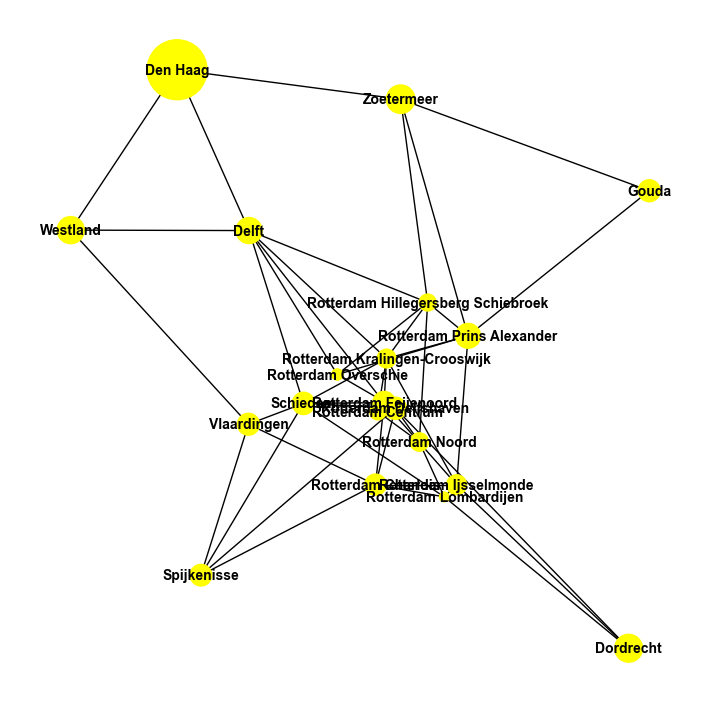

In [100]:
# %matplotlib notebook
draw_graph(Rotterdam_new_graph, 'yellow')

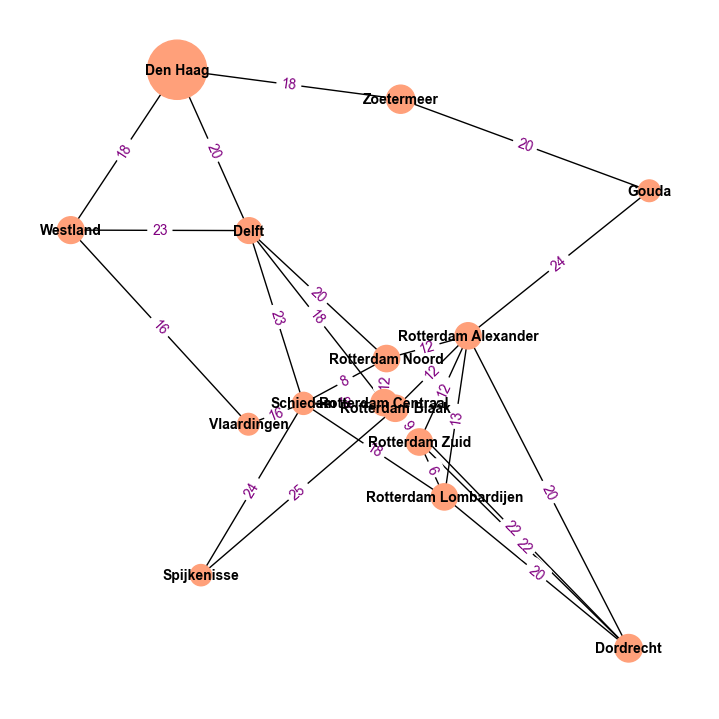

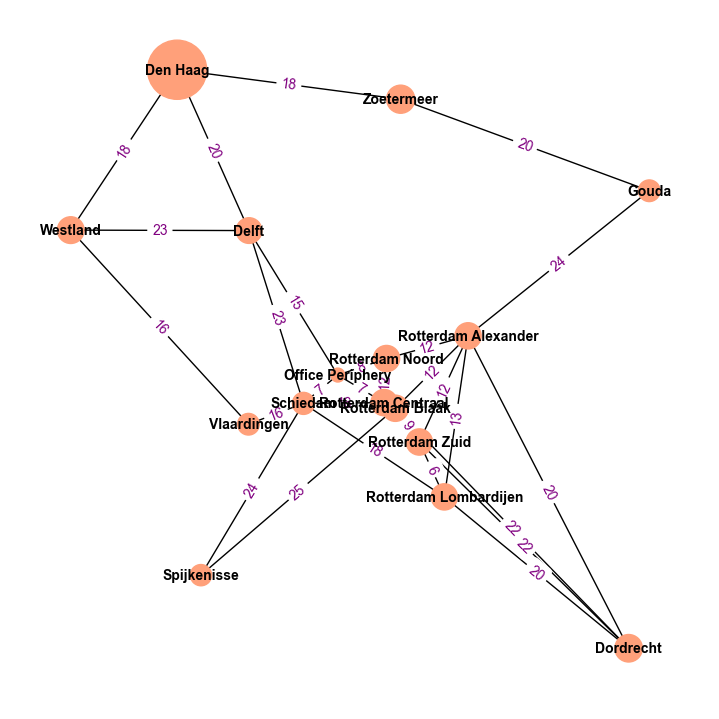

In [101]:
# %matplotlib inline

# These functions have been defined in part 1
draw_graph(Rotterdam_car_graph, 'lightsalmon', edge_dictionary=car_dictionary, edge_color='purple')
draw_graph(Rotterdam_car_graph_peri, 'lightsalmon', edge_dictionary=car_dictionary_peri, edge_color='purple')



### Analysing the two graphs

C:\Users\TimEW\AppData\Local\Temp\ipykernel_4708\1071395020.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  G_betweenness.set_xticklabels(G_betweenness.get_xticklabels(), rotation=90, color='black', ha='center')


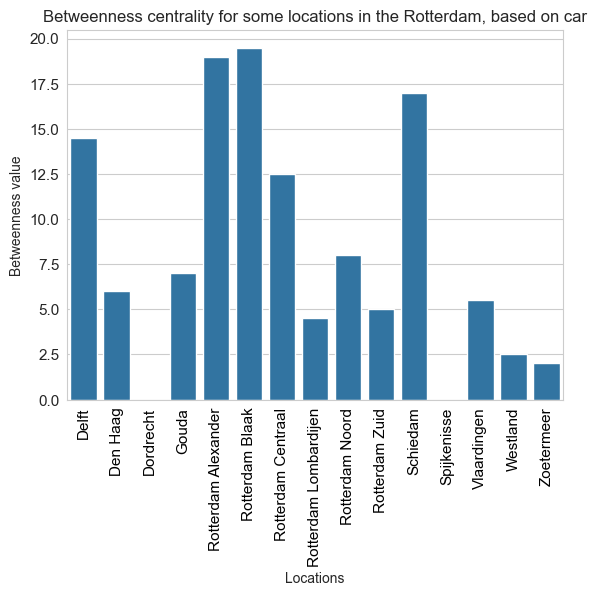

C:\Users\TimEW\AppData\Local\Temp\ipykernel_4708\1071395020.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  G_betweenness.set_xticklabels(G_betweenness.get_xticklabels(), rotation=90, color='black', ha='center')


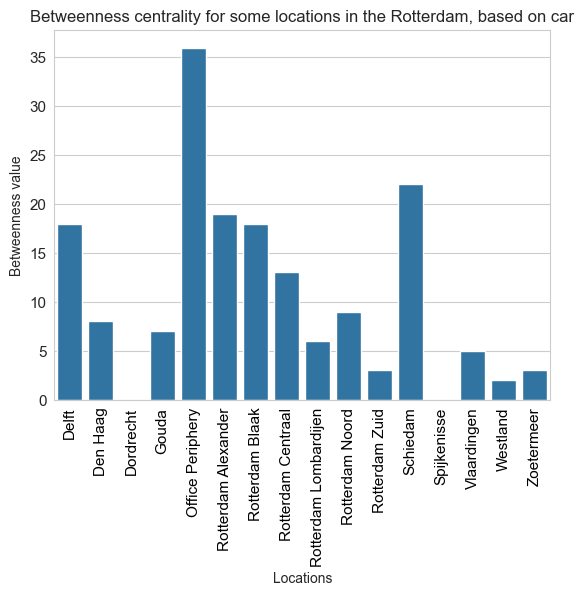

In [102]:
# Betweenness centrality with the car times as factor
plot_betweenness(Rotterdam_car_graph, 'Rotterdam', weight='car')
plot_betweenness(Rotterdam_car_graph_peri, 'Rotterdam', weight='car')

(21.527032961301632, 'Rotterdam Centraal')
(19.43629184130235, 'Rotterdam Blaak')


C:\Users\TimEW\AppData\Local\Temp\ipykernel_4708\4278341987.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Car_office_times_plot.set_xticklabels(Car_office_times_plot.get_xticklabels(), rotation=90, color='black', ha='center')


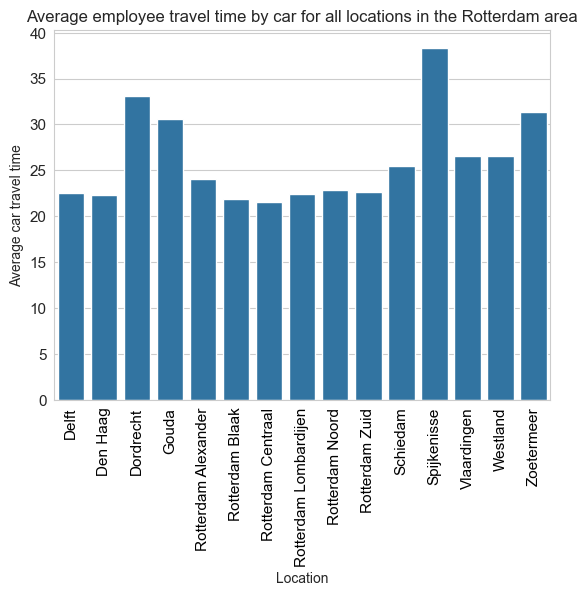

C:\Users\TimEW\AppData\Local\Temp\ipykernel_4708\4278341987.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Car_office_times_plot_peri.set_xticklabels(Car_office_times_plot_peri.get_xticklabels(), rotation=90, color='black', ha='center')


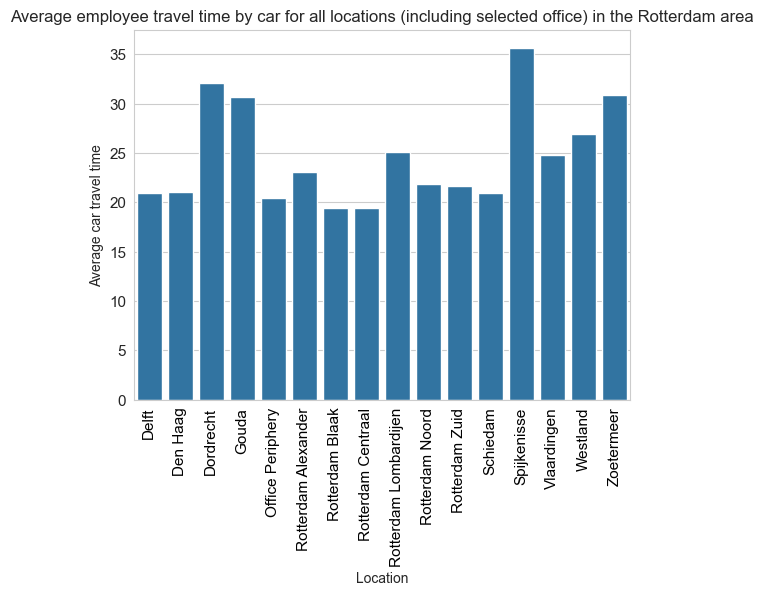

In [103]:
print(one_office(Rotterdam_car_graph, 'car'))
print(one_office(Rotterdam_car_graph_peri, 'car'))

# Now we investigate the average employee travel time to every potential node
office_car_time_dict = {}
for office in Rotterdam_car_graph.nodes():
    variables = average_amount_per_office(Rotterdam_car_graph, office, office, 'car')
    office_car_time_dict.update({office: variables[1]})
    

# Plot the values in a bar chart
Car_office_times_plot = sns.barplot(office_car_time_dict)
Car_office_times_plot.set_title("Average employee travel time by car for all locations in the Rotterdam area")
Car_office_times_plot.set_xticklabels(Car_office_times_plot.get_xticklabels(), rotation=90, color='black', ha='center')
Car_office_times_plot.tick_params(direction='out', pad=2, labelsize=11)
Car_office_times_plot.set(xlabel='Location', ylabel='Average car travel time')
plt.show()

# Now we investigate the average employee travel time to every potential location including the selected office
office_car_time_dict_peri = {}
for office in Rotterdam_car_graph_peri.nodes():
    variables = average_amount_per_office(Rotterdam_car_graph_peri, office, office, 'car')
    office_car_time_dict_peri.update({office: variables[1]})
    

# Plot the values in a bar chart
Car_office_times_plot_peri = sns.barplot(office_car_time_dict_peri)
Car_office_times_plot_peri.set_title("Average employee travel time by car for all locations (including selected office) in the Rotterdam area")
Car_office_times_plot_peri.set_xticklabels(Car_office_times_plot_peri.get_xticklabels(), rotation=90, color='black', ha='center')
Car_office_times_plot_peri.tick_params(direction='out', pad=2, labelsize=11)
Car_office_times_plot_peri.set(xlabel='Location', ylabel='Average car travel time')
plt.show()

##### Now we have to invent something to make our dream of mixed modality come true. Our fundamental principle is that traveling employees can take the car before hopping on public transport but not the opposite, since this would be considered unrealistic. We thus work with two graphs, one for the car network and one for the public transport network, yet in our analyses we will use both at the same time to investigate potential use of mixed modality.

# Here starts the Mixed Modality testing area! - GLaDOS

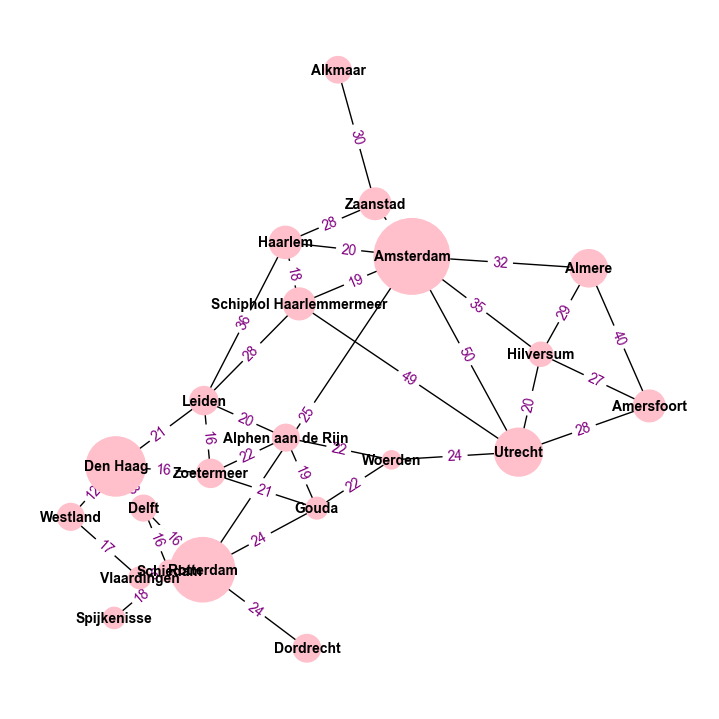

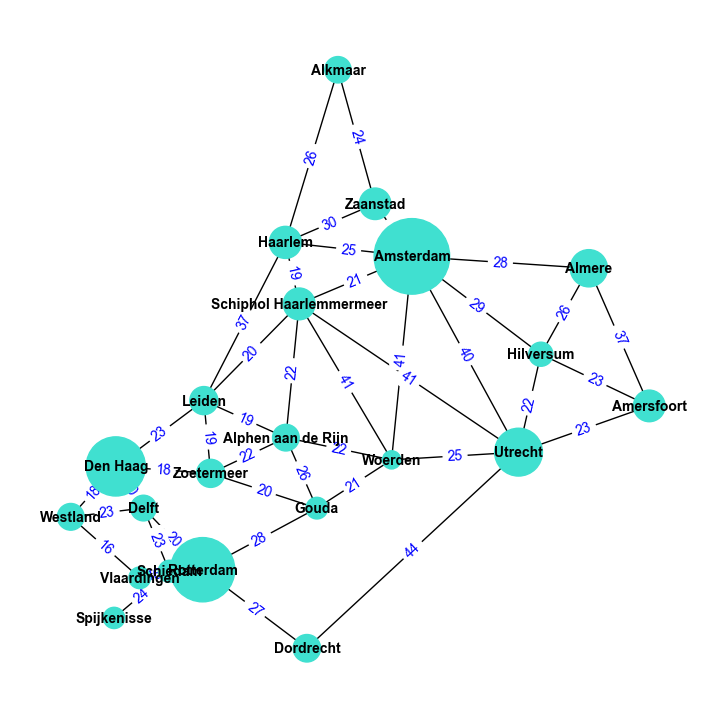

In [104]:
# First we need some test graphs. Since the Rotterdam graphs are still under construction and are being heavily edited as of now, we will modify the randstad graphs and pretend one is for public transport and one is for cars (instead of car times and distances), purely for the sake of testing.

# Make a graph from the dataframe
test_graph_car = nx.from_pandas_adjacency(randstad_network_adjacency)
test_graph_ov = nx.from_pandas_adjacency(randstad_network_adjacency)

# Adding the nodes to our test graphs
adding_node_attributes(test_graph_car, randstad_network)
adding_node_attributes(test_graph_ov, randstad_network)

# Using the distances measures as time measurements for the ov, for the sake of testing
test_car_dictionary = adding_edge_attributes(test_graph_car, randstad_car_times, 'car')
test_ov_dictionary = adding_edge_attributes(test_graph_ov, randstad_car_distance, 'ov')

# Now let's edit the ov graph, so we can actually test the mixed modality function. If both graphs had the same structure then the testing would simply be useless, since the mixed modality function is explicitly used for networks with different edge characteristics.
test_graph_ov.remove_edge('Schiphol Haarlemmermeer', 'Woerden')
test_graph_ov.remove_edge('Schiphol Haarlemmermeer', 'Alphen aan de Rijn')
test_graph_ov.remove_edge('Alkmaar', 'Haarlem')
test_graph_ov.remove_edge('Westland', 'Delft')
test_graph_ov.remove_edge('Amsterdam', 'Woerden')
test_graph_ov.remove_edge('Dordrecht', 'Utrecht')
test_graph_ov.add_edge('Amsterdam', 'Rotterdam', ov = 25)

test_ov_dictionary_2 = nx.get_edge_attributes(test_graph_ov, 'ov')
test_car_dictionary_2 = nx.get_edge_attributes(test_graph_car, 'car')

draw_graph(test_graph_ov, 'pink', test_ov_dictionary_2, 'purple')
draw_graph(test_graph_car, 'turquoise', test_car_dictionary_2, 'blue')

In [105]:
# Now we introduce the actual mixed modality function. The key focus being that one can only switch from car to public transport. A traveller can thus effectively only switch ones.
# It is crucial for this function that: 1. one graph is a car network graph and the other a public network graph. 2. Both graphs have the same network nodes. 3. The attributes of these graphs are properly named. 4. Both graphs are connected.

def shortest_path_mixed_modality(graph_car, graph_ov, start, stop):
    # The graphs need to be both modalities and properly named
    if not nx.get_edge_attributes(graph_ov, 'ov') or not nx.get_edge_attributes(graph_car, 'car') or not nx.is_connected(graph_ov) or not nx.is_connected(graph_car):
        print('Error! These graphs are not sufficient for this function')
    else:
        # Shortest paths solely by one modality
        shortest_ov_path = shortest_path(graph_ov, start, stop, 'ov')
        shortest_ov_len = path_weight(graph_ov, shortest_ov_path, 'ov')
        shortest_car_path = shortest_path(graph_car, start, stop, 'car')
        shortest_car_len = path_weight(graph_car, shortest_car_path, 'car')
        
        # The ultimately selected paths
        if shortest_ov_len < shortest_car_len:
            shortest_final_path = shortest_ov_path
            shortest_final_len = shortest_ov_len
            modality = 'ov'
        else:
            shortest_final_path = shortest_car_path
            shortest_final_len = shortest_car_len
            modality = 'car'
        
        # The dictionary with all shortest public transport times to the destination, regardless of starting point
        all_ov = nx.shortest_path_length(graph_ov, target=stop, weight='ov')
        
        # To mix modalities we should investigate whether you can drive to any starting point of the public transport network and get a shortest path to the final destination.
        for starting_point_ov, path_len in all_ov.items():
            car_to_start_path = shortest_path(graph_car, source=start, target=starting_point_ov, weight='car')
            car_to_start_len = path_weight(graph_car, car_to_start_path, weight='car')
            if shortest_final_len > path_len + car_to_start_len:
                shortest_final_len = path_len + car_to_start_len
                shortest_final_path = car_to_start_path + shortest_path(graph_ov,source=starting_point_ov, target=stop, weight='ov')
                modality = 'mixed'
                
        return shortest_final_path, shortest_final_len, modality

# Testing area
print(shortest_path_mixed_modality(graph_car=test_graph_car, graph_ov=test_graph_ov, start='Dordrecht', stop='Utrecht'))
print(shortest_path_mixed_modality(graph_car=test_graph_car, graph_ov=test_graph_ov, start='Alkmaar', stop='Rotterdam'))
print(shortest_path_mixed_modality(graph_car=test_graph_car, graph_ov=test_graph_ov, start='Almere', stop='Den Haag'))

(['Dordrecht', 'Utrecht'], 44, 'car')
(['Alkmaar', 'Zaanstad', 'Amsterdam', 'Amsterdam', 'Rotterdam'], 58, 'mixed')
(['Almere', 'Amsterdam', 'Schiphol Haarlemmermeer', 'Leiden', 'Den Haag'], 71, 'car')


In [107]:
# Now, with mixed modularity in mind, we can build a function that calculates the location that results in the shortest travel time per employee. Yet again for mixed modularity the previously stated requirements still stand. The node characteristics in both graphs must be the same.
def best_office_with_mixed_mod(graph_car, graph_ov):
    
    # The desired output variables
    final_average_employee_travel_time = np.inf
    final_path_dict = {}
    final_office = ''
    
    # Now all locations in the graph are scanned, which graph that is iterated over doesn't matter, since node characteristics should be the same:
    for potential_office in graph_car.nodes():
        
        # Per potential office find the desired output with auxiliary variables and investigate whether they suit better.
        total_employees = 0
        # The paths will be weighted for the amount of traveling employees per node
        total_weighted_path_len = 0
        path_dict = {}
        
        for starting_point in graph_car.nodes():
            # Per starting node, the values are calculated to the selected office
            path, path_len, modality = shortest_path_mixed_modality(graph_car=graph_car, graph_ov=graph_ov, start=starting_point, stop=potential_office)
            path_dict.update({starting_point: (path, path_len, modality)})
            employees = graph_car.nodes[starting_point]['employees']
            total_employees += employees
            # Calculate and sum the calculated travel time from the starting points to this office
            total_weighted_path_len += path_len * employees
        
        # The weighted employee travel time to this specific office
        potential_office_average_employee_travel_time = total_weighted_path_len / total_employees
        
        # If an office with a shorter (weighted for employee travel time) path is found, this one is selected, including corresponding dictionary and the average travel time
        if final_average_employee_travel_time > potential_office_average_employee_travel_time:
            final_average_employee_travel_time = potential_office_average_employee_travel_time
            final_path_dict = path_dict
            final_office = potential_office
            
    return final_office, final_average_employee_travel_time, final_path_dict

office, average_employee_travel_time, travel_dict = best_office_with_mixed_mod(test_graph_car, test_graph_ov)
print(f"the final office in these test is {office} with an average employee travel time of {average_employee_travel_time} minutes")
print("The travel patterns per city towards the office are as follows")
print([(i, j[2]) for i,j in travel_dict.items() if i != office])

the final office in these test is Amsterdam with an average employee travel time of 28.594729632307665 minutes
The travel patterns per city towards the office are as follows
[('Alkmaar', 'car'), ('Almere', 'car'), ('Alphen aan de Rijn', 'car'), ('Amersfoort', 'car'), ('Delft', 'ov'), ('Den Haag', 'car'), ('Dordrecht', 'ov'), ('Gouda', 'ov'), ('Haarlem', 'ov'), ('Hilversum', 'car'), ('Leiden', 'car'), ('Rotterdam', 'ov'), ('Schiedam', 'ov'), ('Schiphol Haarlemmermeer', 'ov'), ('Spijkenisse', 'ov'), ('Utrecht', 'car'), ('Vlaardingen', 'ov'), ('Westland', 'mixed'), ('Woerden', 'car'), ('Zaanstad', 'ov'), ('Zoetermeer', 'car')]


# Here ends the Mixed Modality Testing Area! GlaDOS Out!

### Import to know

**Several connections within the train network are not by train. These will shortly be summarized here:**

_- Westland:_ All connections are by bus.
_- Vlaardingen_: The connection is by Metro (but very similar connections exist by bus)
_- Spijkenisse_: The connection is by Metro
_- The Office on the Periphery_: The connections are by bus, the office is right next to a bus line. 